Analisi del dataset "Titanic" e creazione
di un modello predittivo sfruttando i
relativi dati.

In [1]:
# importazione librerie necessarie
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# importazione dati da file CSV in un
# dataframe di Pandas
data = pd.read_csv('data/titanic.csv')

# visualizzazione delle prime 10 righe
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
# verifica presenza campi nulli nel dataset
data.isnull().values.any()

False

In [4]:
# conversione dataframe in array NumPy
data = data.values

In [5]:
# creazione dataset x e y
x = data[:, 1:]
y = data[:, 0]

In [6]:
# visualizzazione del 42esimo esempio
print(x[42])
print('')
print(y[42])

[2 'Miss. Simonne Marie Anne Andree Laroche' 'female' 3.0 1 2 41.5792]

1


In [9]:
# cambio di dimensioni per il
# dataset y (in modo da renderlo
# compatibile con gli standard
# imposti da Keras / Tensoflow)
y = np.reshape(y, (len(y), 1))

print(y[42])

[1]


In [10]:
# stampa del terzo campo (sesso)
# dell'esempio 42esimo
print(x[42][2])

# creazione di un "LabelEncoder" per
# la convervesione di un campo (sesso)
# di tipo testo in un valore numerico
label_encoder_sex = LabelEncoder()
x[:,2] = label_encoder_sex.fit_transform(x[:,2])

print(x[42][2])

female
0


In [11]:
# cancellazione della seconda colonna
# contenente il nominativo del proprietario
# del biglietto
x = np.delete(x, 1, axis=1)

In [12]:
# visualizzazione di tre esempi dal dataset
print(x[42:45])

[[2 0 3.0 1 2 41.5792]
 [3 0 19.0 0 0 7.8792]
 [3 1 30.0 0 0 8.05]]


In [13]:
# conversione in formato numpy array
# con float32 come tipolgia di dati
x = np.array(x, dtype='float32')
y = np.array(y, dtype='float32')

# suddivisione del dataset in dataset
# di addestramento e di validazione
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
# visualizzazione dimensioni dataset
print(x_train.shape)
print(y_train.shape)
print('---')
print(x_test.shape)
print(y_test.shape)

(709, 6)
(709, 1)
---
(178, 6)
(178, 1)


In [15]:
# normalizzazione dataset
sc = MinMaxScaler()
sc.fit(x_train)

x_train_norm = sc.transform(x_train)
x_test_norm = sc.transform(x_test)

In [16]:
# creazione di un modello
# predittivo in Keras

classifier = Sequential()

# layer di input
classifier.add(Dense(units=5, activation='relu', input_dim=x.shape[1]))

# primo layer nascosto
classifier.add(Dense(units=5, activation='relu'))

# secondo layer nascosto
classifier.add(Dense(units=10, activation='relu'))

# terzo layer, output della rete
classifier.add(Dense(units=1, use_bias=False, activation='sigmoid'))

# compilazione del modello
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# log architettura modello creato
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [17]:
# addestramento del modello con verbose=0 per evitare
# il log testuale dell' addestramento
training_history = classifier.fit(
    x_train_norm,
    y_train,
    validation_data=(x_test_norm, y_test),
    batch_size=150,
    epochs=250,
    verbose=0
)

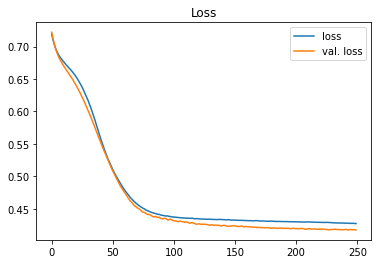

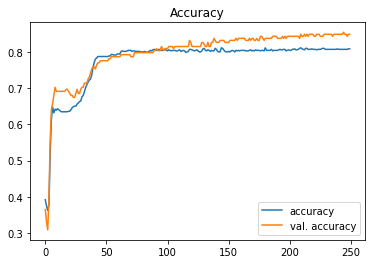

In [18]:
# grafici andamento addestramento modello

# errore
plt.title('Loss')
plt.plot(training_history.history['loss'], label='loss')
plt.plot(training_history.history['val_loss'], label='val. loss')
plt.legend()

plt.show()

# accuratezza
plt.title('Accuracy')
plt.plot(training_history.history['accuracy'], label='accuracy')
plt.plot(training_history.history['val_accuracy'], label='val. accuracy')
plt.legend()

plt.show()

In [19]:
# predizioni di nuovi dati
# il dataset di validazione
# non è stato utilizzato
# durante l'addestramento
predictions = classifier.predict(x_test_norm)
predictions = [0 if p < 0.5 else 1 for p in predictions]

In [20]:
print('Accuratezza modello:', accuracy_score(y_test, predictions) * 100, '%')

Accuratezza modello: 84.8314606741573 %
